In [1]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
import numpy as np
import pandas as pd
import math
from sklearn import preprocessing
import tensorflow as tf

/home/monn/anaconda3/envs/374/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/monn/anaconda3/envs/374/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/monn/anaconda3/envs/374/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/monn/anaconda3/envs/374/lib/python3.7/site-packages/ten

In [2]:
data = pd.read_excel('Alanine-sample-limit.xlsx')
data.head()

FileNotFoundError: [Errno 2] No such file or directory: 'Alanine-sample-limit.xlsx'

In [ ]:
x = data["m/z"]
y = data["Absolute Intensity"]
z = data["Relative Intensity"]

x = np.asarray(x)
y = np.asarray(y)
z = np.asarray(z)

nx = x/max(x) # max nomal
ny = y/max(y)
nz = z/max(z)

lx = np.log(x) # log nomal
ly = np.log(y)
lz = np.log(z)

nlx = lx/max(lx) # max log nomal
nly = ly/max(ly)
nlz = lz/max(lz)

ex = np.exp(x) # exp nomal
ey = np.exp(y)
ez = np.exp(z)

etx = nx*(np.log2(1/nx)) # entropy nomal
ety = ny*(np.log2(1/ny))
etz = nz*(np.log2(1/nz))

print(etx)

print('x:{}, max_x:{}, nx:{}'.format(x[0], max(x), nx[0]))
print('y:{}, max_y:{}, ny:{}'.format(y[0], max(y),ny[0]))
print('z:{}, max_z:{}, nz:{}'.format(z[0], max(z),nz[0]))

In [ ]:
arraynlx = nlx.reshape((1,279))
arraynly = nly.reshape((1,279))
arraynlz = nlz.reshape((1,279))

print(arraynlx)
print(arraynly)
print(arraynlz)

In [41]:
np.savez('Alanine-sample-limit-log.npz', arraynlx=arraynlx, arraynly=arraynly, arraynlz=arraynlz)
data = np.load('Alanine-sample-limit-log.npz')
x = data['arraynlx']
y = data['arraynly']
z = data['arraynlz']
print(data)
print(x)
print(y)
print(z)

[[0.63534758 0.63901595 0.64260542 0.64611932 0.64956077 0.65623782
  0.65623782 0.65947878 0.662658   0.66577779 0.66884034 0.6718477
  0.67480183 0.67770459 0.68055772 0.6833629  0.6861217  0.68883565
  0.69150617 0.69413464 0.69927056 0.70178044 0.70425314 0.70668974
  0.70909128 0.71379311 0.71609527 0.71836611 0.72060647 0.72281715
  0.72499894 0.72715257 0.72927876 0.73137821 0.73345158 0.73549951
  0.73752262 0.73952149 0.74149671 0.74344883 0.74537838 0.74728587
  0.74917182 0.75103668 0.75470505 0.75650944 0.75829453 0.76006073
  0.76180843 0.76353802 0.76524987 0.76694434 0.76862179 0.77028254
  0.77192693 0.77355527 0.77516788 0.77676507 0.77834711 0.77991429
  0.7830052  0.78452945 0.7860399  0.78753681 0.78902041 0.79049094
  0.79194863 0.79339369 0.79482636 0.79624683 0.79765531 0.799052
  0.80043711 0.80181081 0.8031733  0.80452476 0.80586536 0.80719528
  0.80851469 0.80982375 0.81112262 0.81241146 0.81369042 0.81495966
  0.81621932 0.81871047 0.81994224 0.82116499 0.822

In [8]:
colors = cm.hsv(nz)
colmap = cm.ScalarMappable(cmap=cm.hsv)
colmap.set_array(z)

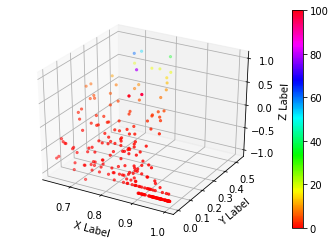

In [30]:

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(nlx, ety, nlz, c=colors, marker='.')
cb = fig.colorbar(colmap)

ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')

plt.show()

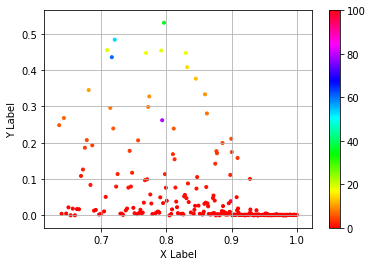

<Figure size 432x288 with 0 Axes>

In [27]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(nlx, nly, c=colors, marker='.')
cb = fig.colorbar(colmap)

ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
plt.grid()
plt.show()
plt.savefig("logx-ety-figure1.png")

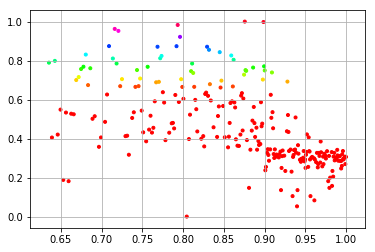

In [45]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(nlx, nly, c=colors, marker='.')


plt.grid()
plt.show()
fig.savefig("alanine1.jpeg")

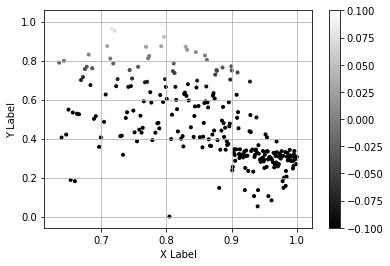

<Figure size 432x288 with 0 Axes>

In [12]:
g_colors = cm.gray(nlz)
g_colmap = cm.ScalarMappable(cmap=cm.gray)
g_colmap.set_array(z)

fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(nlx, nly, c=g_colors, marker='.')
cb = fig.colorbar(g_colmap)

ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
plt.grid()
plt.show()
plt.savefig("figure1-1.png")